# Análisis exploratorio - Sistema para compartir bicicletas

+ Basado en datos de [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)
+ Este notebook se basa en el archivo de datos por hora, *hour.csv* (renombrado a *MLII - Clase 12 - datos.csv*)

---
Referencia:
Fanaee-T, Hadi, and Gama, Joao, 'Event labeling combining ensemble detectors and background knowledge', Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg,

## Importamos librerías




In [ ]:
# manipulación de datos 
import numpy as np
import pandas as pd

# gráficos
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

# definición de parámetros
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

sn.set_style('whitegrid')
sn.set_context('talk')

plt.rcParams.update(params)
pd.options.display.max_colwidth = 600

# para mostrar data frames como tablas
from IPython.display import display, HTML


## Leer datos

In [ ]:
from google.colab import files
data_to_load = files.upload()
hour_df = pd.read_csv('MLII - Clase 12 - datos.csv')

#hour_df = pd.read_csv('MLII - Clase 12 - datos.csv')
print("Forma del dataset::{}".format(hour_df.shape))

Saving MLII - Clase 12 - datos.csv to MLII - Clase 12 - datos.csv
Forma del dataset::(17379, 17)


In [ ]:
display(hour_df.head())

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Tipo de datos y resumen de estadística

In [ ]:
hour_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


El conjunto de datos tiene:
+ 17 atributos en total y 17k+ registros
+ Excepto dtedat, el resto son numéricos (int o float)
+ Como se indica en la página del conjunto de datos de la UCI, se han normalizado los siguientes atributos (lo mismo se confirma arriba):
    + temp, atemp
    + humedad
    + velocidad del viento
+ El conjunto de datos tiene muchas variables categóricas como temporada, año, vacaciones, situación meteorológica, etc. Habrá que tratarlas con cuidado.


## Nombres de atributos estándar

In [ ]:
hour_df.rename(columns={'instant':'rec_id',
                      'dteday':'datetime',
                      'holiday':'is_holiday',
                      'workingday':'is_workingday',
                      'weathersit':'weather_condition',
                      'hum':'humidity',
                      'mnth':'month',
                      'cnt':'total_count',
                      'hr':'hour',
                      'yr':'year'},inplace=True)


## Conversión de tipos de datos

In [ ]:
# Conversión a date_time
hour_df['datetime'] = pd.to_datetime(hour_df.datetime)

# Variables categóricas
hour_df['season'] = hour_df.season.astype('category')
hour_df['is_holiday'] = hour_df.is_holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['weather_condition'] = hour_df.weather_condition.astype('category')
hour_df['is_workingday'] = hour_df.is_workingday.astype('category')


## Visualizar Atributos, Tendencias y Relaciones

### Distribution horaria del Total de Usos

+ Las estaciones se codifican como 1:invierno, 2:primavera, 3:verano, 4:otoño
+ Ejercicio: Convertir los nombres de las estaciones en cadenas legibles y volver a visualizar los datos


[Text(0.5, 1.0, 'Distribución de cuentas horaria por estación')]

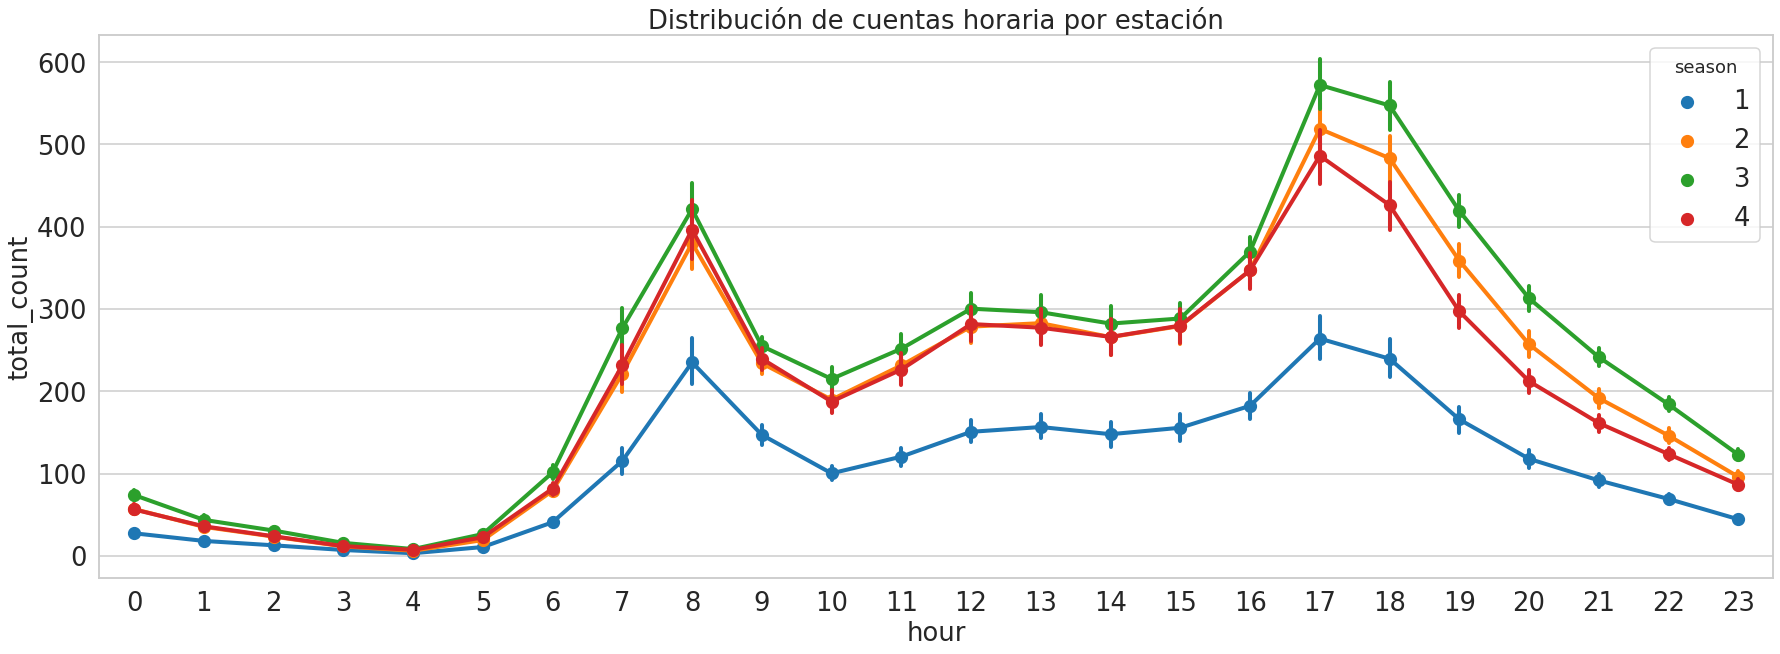

In [ ]:
fig,ax = plt.subplots()
sn.pointplot(data=hour_df[['hour',
                           'total_count',
                           'season']],
             x='hour',y='total_count',
             hue='season',ax=ax)
ax.set(title="Distribución de cuentas horaria por estación")

+ El gráfico anterior muestra picos en torno a las 8 de la mañana y las 5 de la tarde (horario de oficina)
+ En general, el uso es mayor en la segunda mitad del día

[Text(0.5, 1.0, 'Distribución de cuentas horaria por día de la semana')]

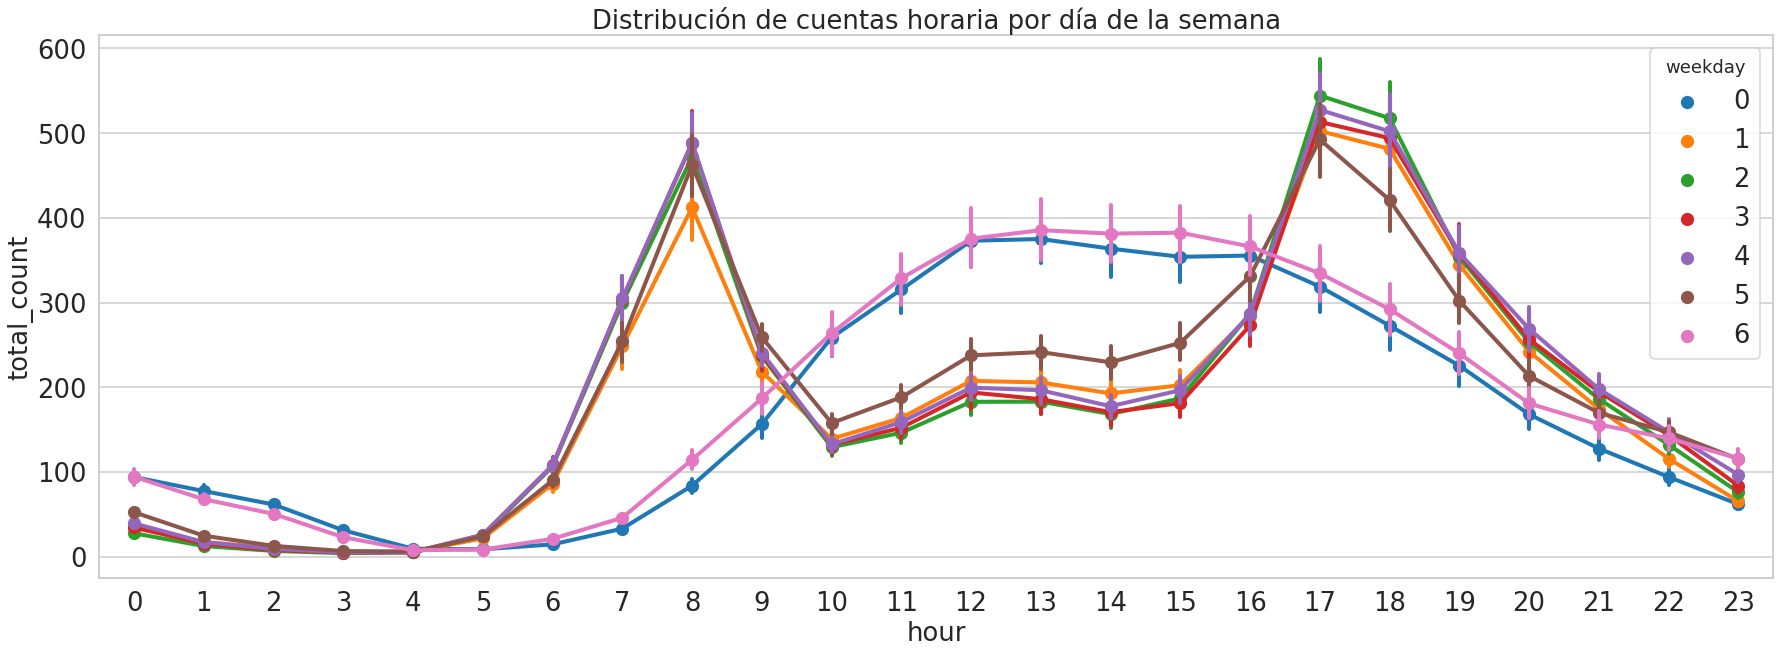

In [ ]:
fig,ax = plt.subplots()
sn.pointplot(data=hour_df[['hour','total_count','weekday']],x='hour',y='total_count',hue='weekday',ax=ax)
ax.set(title="Distribución de cuentas horaria por día de la semana")

+ Los fines de semana (0 y 6) y los días laborables (1-5) muestran tendencias de uso diferentes, con el pico de uso del fin de semana en las horas de la tarde
+ Los días de la semana siguen la tendencia general, similar a la visualizada en el gráfico anterior
+ Los días de la semana tienen un mayor uso en comparación con los fines de semana
+ Sería interesante ver las tendencias de los usuarios ocasionales y registrados por separado

[Text(0.5, 1.0, "'Box Plot' para la distribución horaria de cuentas")]

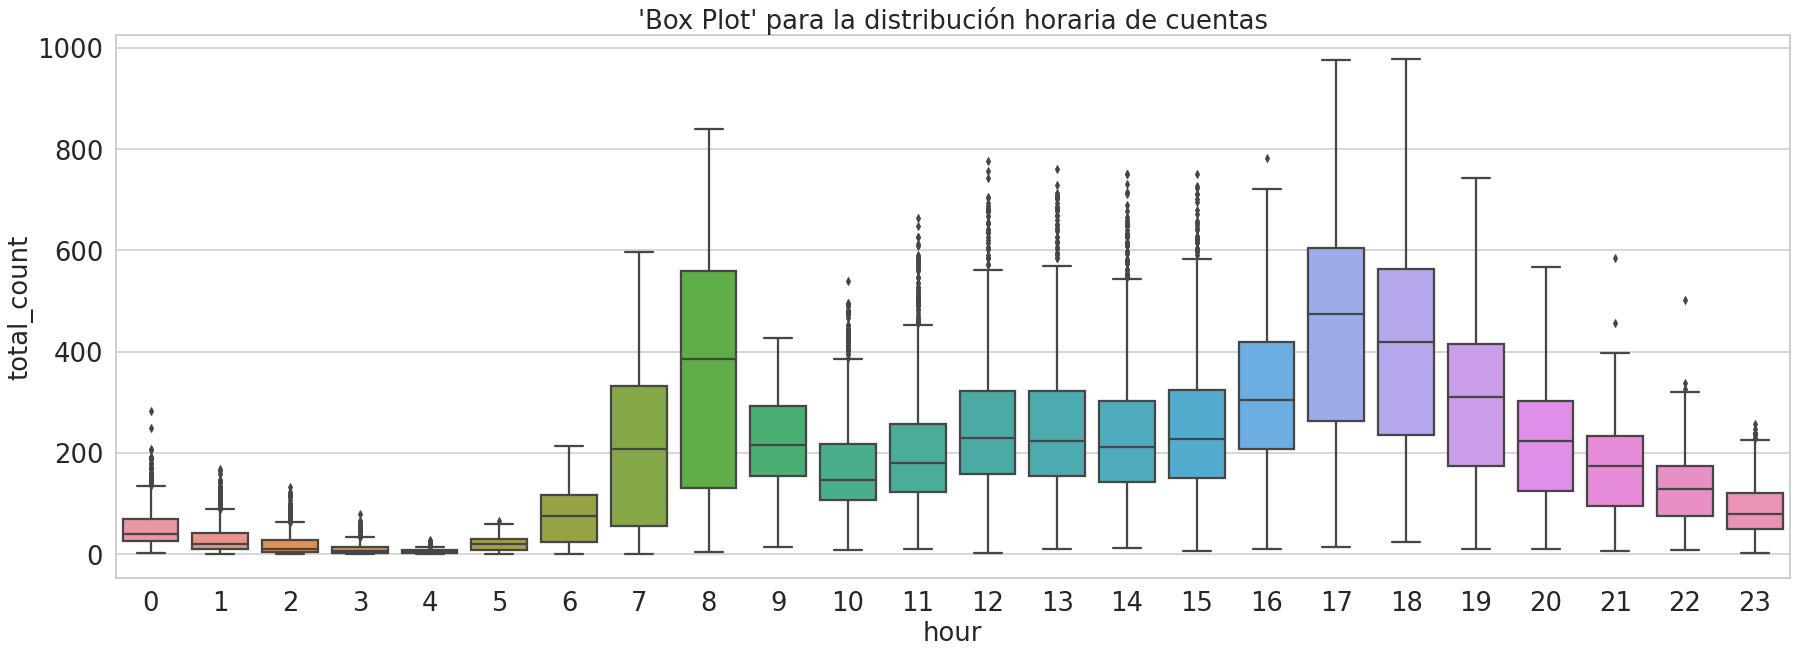

In [ ]:
fig,ax = plt.subplots()
sn.boxplot(data=hour_df[['hour','total_count']],x="hour",y="total_count",ax=ax)
ax.set(title="'Box Plot' para la distribución horaria de cuentas")

+ Las horas tempranas (0-4) y las tardías (21-23) tienen recuentos bajos pero con valores atípicos significativos
+ Las horas de la tarde también tienen valores atípicos
+ Las horas punta tienen medianas más altas y recuentos globales sin apenas valores atípicos

### Distribución mensual del total de cuentas



[Text(0.5, 1.0, 'Distribución mensual de cuentas')]

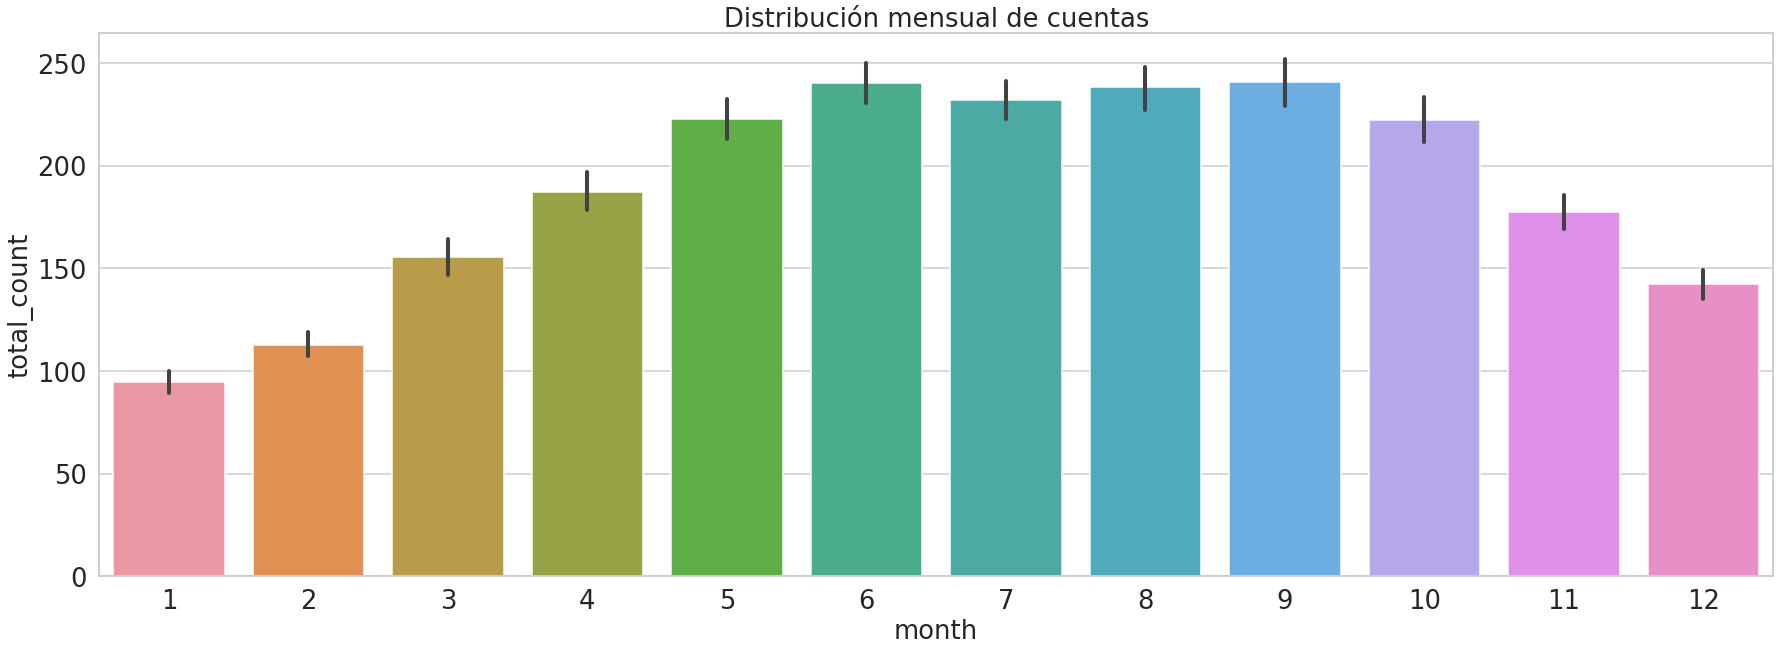

In [ ]:
fig,ax = plt.subplots()
sn.barplot(data=hour_df[['month',
                         'total_count']],
           x="month",y="total_count")
ax.set(title="Distribución mensual de cuentas")

+ Los meses de junio a octubre son los que presentan los mayores recuentos. El otoño parece ser la época favorita del año para utilizar las bicicletas

[Text(0.5, 1.0, 'Otoño')]

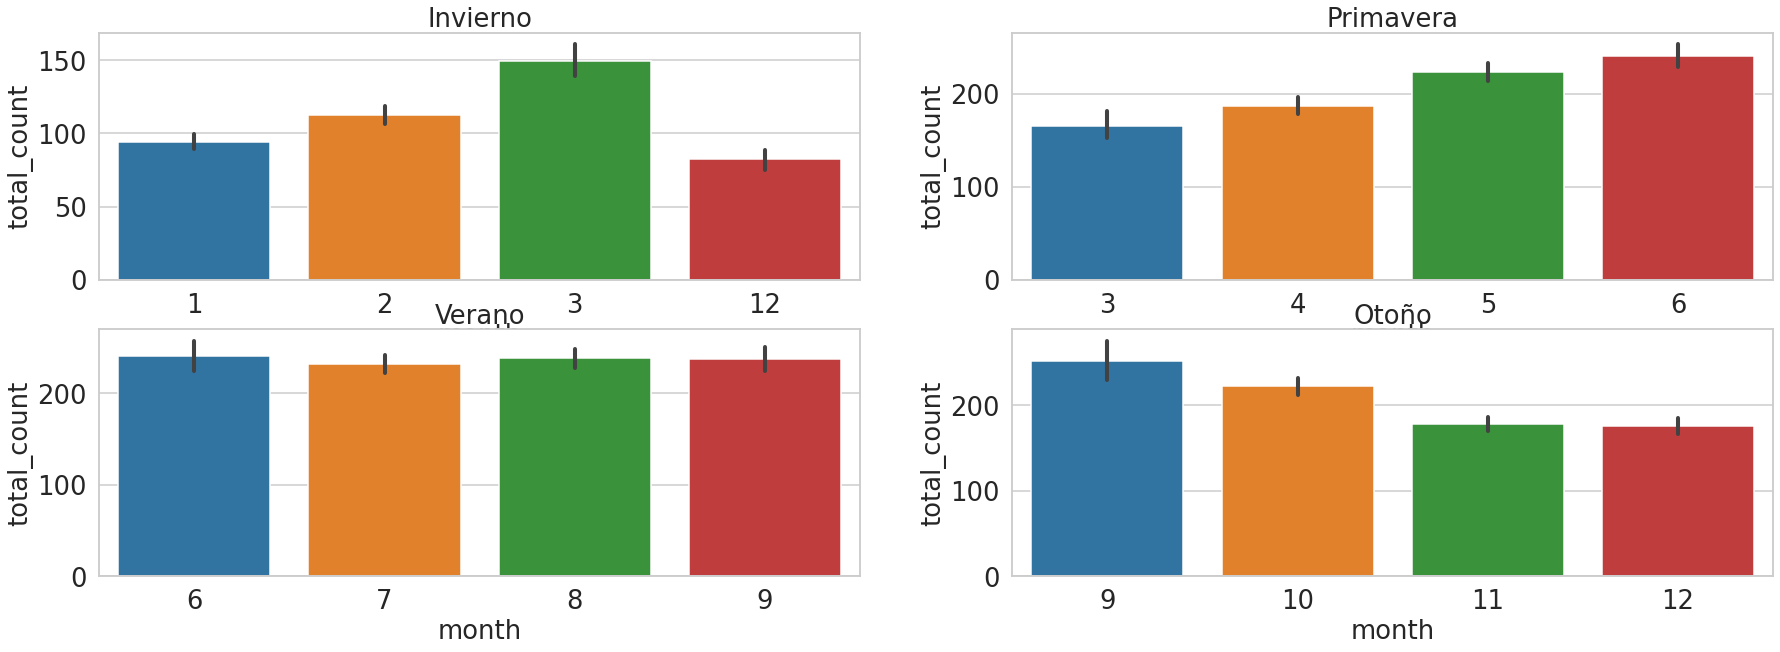

In [ ]:
df_col_list = ['month','weekday','total_count']
plot_col_list= ['month','total_count']
spring_df = hour_df[hour_df.season==1][df_col_list]
summer_df = hour_df[hour_df.season==2][df_col_list]
fall_df = hour_df[hour_df.season==3][df_col_list]
winter_df = hour_df[hour_df.season==4][df_col_list]

fig,ax= plt.subplots(nrows=2,ncols=2)
sn.barplot(data=spring_df[plot_col_list],x="month",y="total_count",ax=ax[0][0],)
ax[0][0].set(title="Invierno")

sn.barplot(data=summer_df[plot_col_list],x="month",y="total_count",ax=ax[0][1])
ax[0][1].set(title="Primavera")

sn.barplot(data=fall_df[plot_col_list],x="month",y="total_count",ax=ax[1][0])
ax[1][0].set(title="Verano")

sn.barplot(data=winter_df[plot_col_list],x="month",y="total_count",ax=ax[1][1])  
ax[1][1].set(title="Otoño")

### Distribución de cuentas anuales

Los gráficos de violín son similares a los gráficos de caja. Al igual que los boxplots, los violines también visualizan el rango intercuartil y
otras estadísticas de resumen como la media/mediana. Sin embargo, estos gráficos son más potentes que los boxplots estándar debido a
su capacidad para visualizar la densidad de probabilidad de los datos. Esto es particularmente útil si los datos son multimodales.

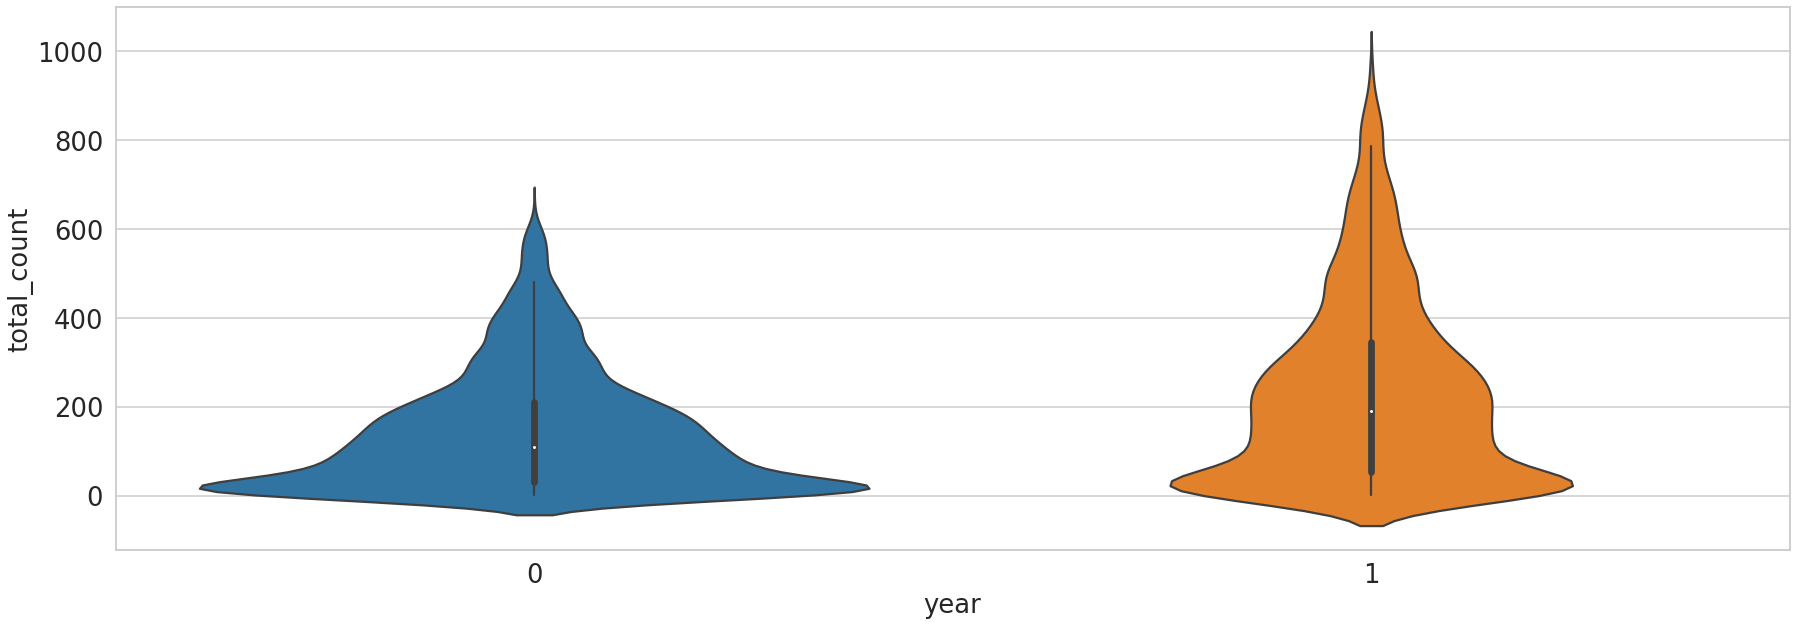

In [ ]:
sn.violinplot(data=hour_df[['year',
                            'total_count']],
              x="year",y="total_count")

+ Ambos años tienen distribuciones multimodales
+ 2011 tiene un recuento global más bajo con una mediana más baja
+ 2012 tiene un recuento máximo más alto, aunque los picos se sitúan en torno a los 100 y los 300, que luego disminuyen

### Distribución de días laborables vs no laborables

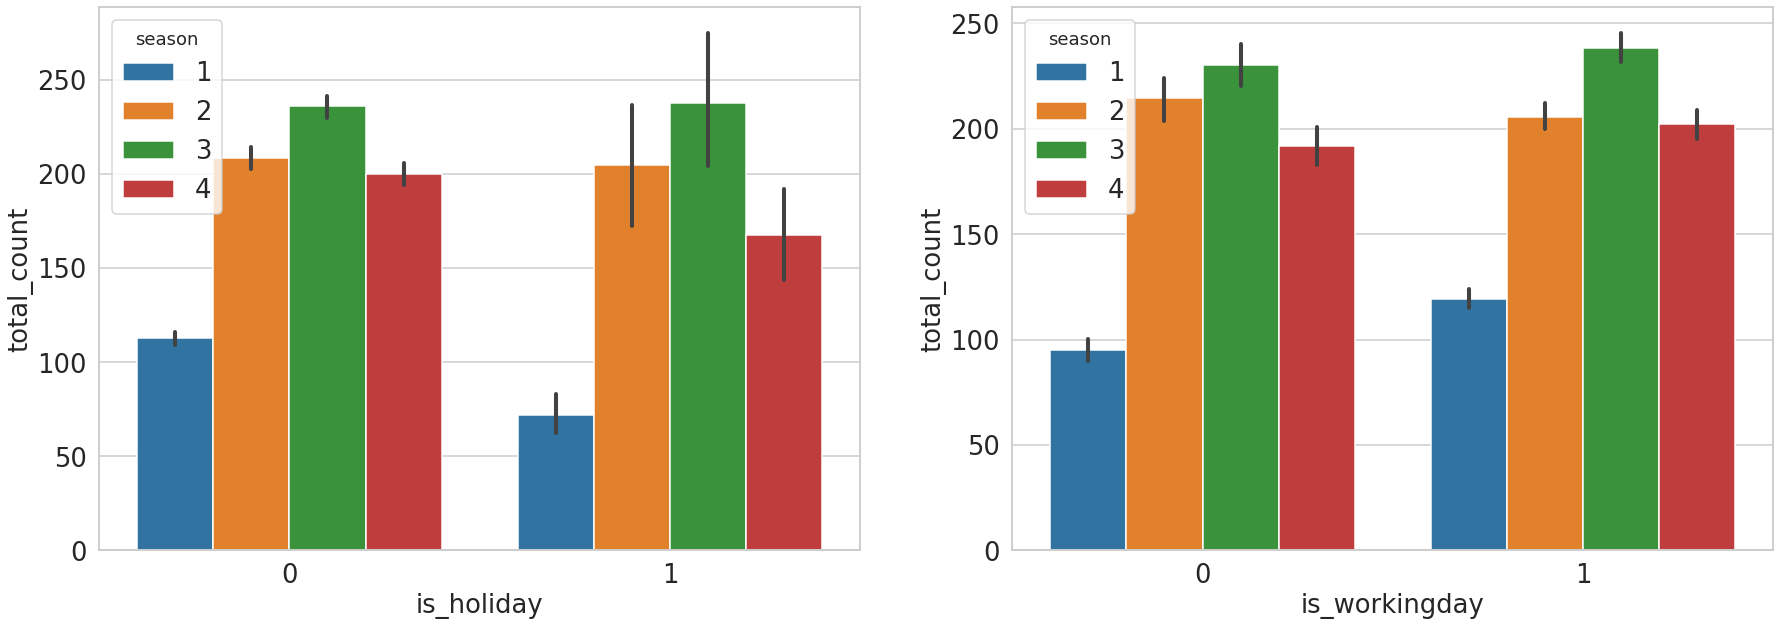

In [ ]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
sn.barplot(data=hour_df,x='is_holiday',y='total_count',hue='season',ax=ax1)
sn.barplot(data=hour_df,x='is_workingday',y='total_count',hue='season',ax=ax2)

### Valores atípicos (outliers)

Mientras exploramos y aprendemos sobre cualquier conjunto de datos, es imperativo que comprobemos los valores extremos e improbables. Aunque manejamos la información faltante e incorrecta durante el preprocesamiento del conjunto de datos, los valores atípicos
suelen detectarse durante el EDA. Los valores atípicos pueden tener un impacto severo y adverso en los pasos posteriores como el modelado
y los resultados.
Por lo general, utilizamos gráficos de caja para comprobar si hay valores atípicos en los datos.

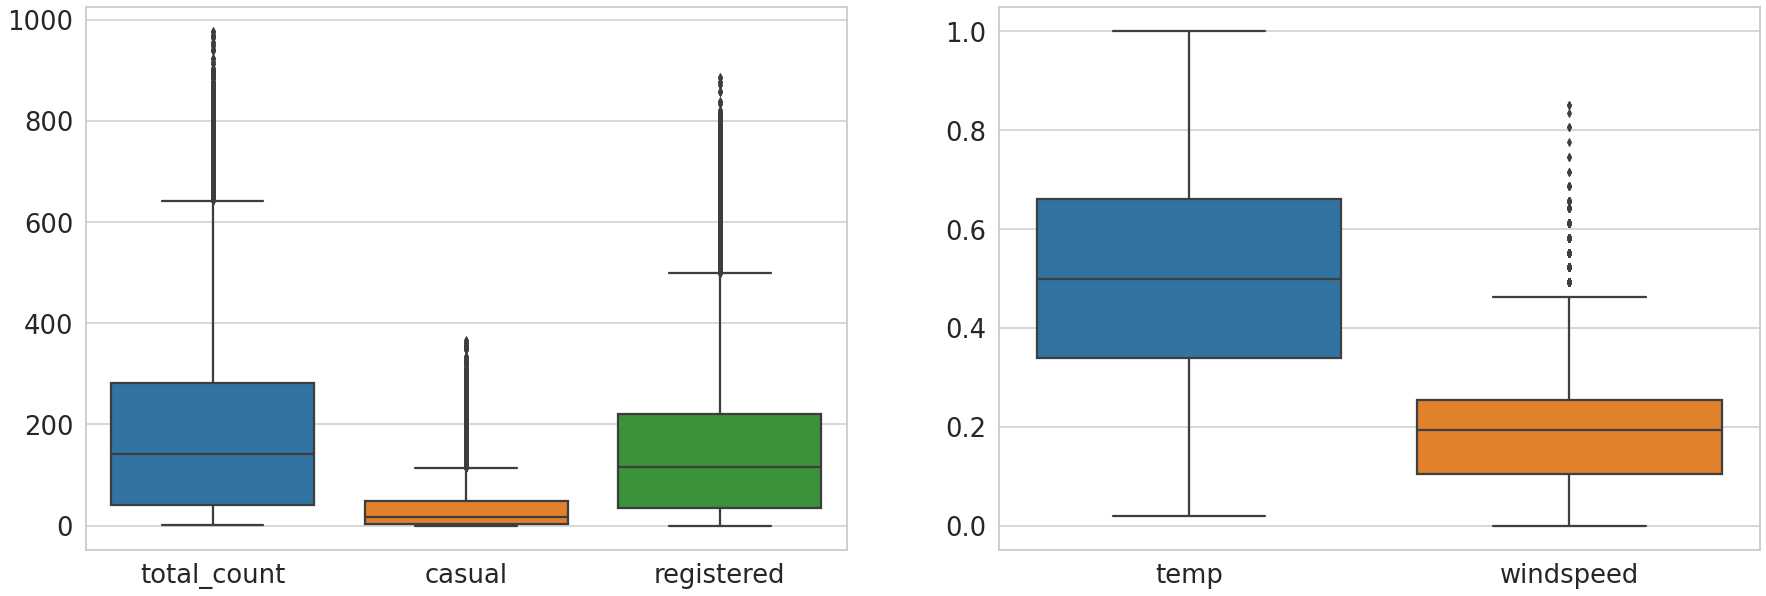

In [ ]:
fig,(ax1,ax2)= plt.subplots(ncols=2)
sn.boxplot(data=hour_df[['total_count',
                         'casual','registered']],ax=ax1)
sn.boxplot(data=hour_df[['temp','windspeed']],ax=ax2)

### Correlaciones

La correlación nos ayuda a entender las relaciones entre los diferentes atributos de los datos para construir mejores modelos.

■ Nota: Es importante entender que la correlación no implica causalidad.

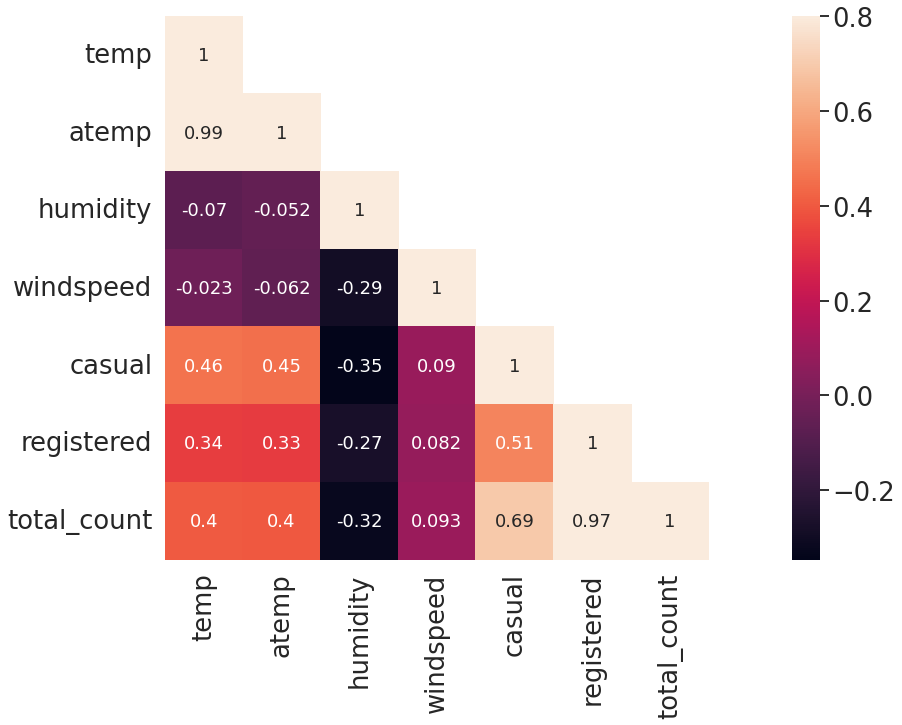

In [ ]:
corrMatt = hour_df[["temp","atemp",
                    "humidity","windspeed",
                    "casual","registered",
                    "total_count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sn.heatmap(corrMatt, mask=mask,
           vmax=.8, square=True,annot=True)

+ La correlación entre temp y atemp es muy alta (como se esperaba)
+ Lo mismo ocurre con registered-total_count y casual-total_count
+ La velocidad del viento con respecto a la humedad tiene una correlación negativa
+ Las estadísticas generales de correlación no son muy altas.

# Modelización lineal del conjunto de datos

+ Modelización lineal mediante la regresión lineal

### Planteamiento del problema
Dado el conjunto de datos con información a nivel horario de las bicicletas junto con el clima y otros atributos, modelar un sistema que pueda predecir el recuento de bicicletas.

In [ ]:
# modelado
import scipy.stats as stats
from sklearn import metrics
from sklearn import preprocessing
from sklearn import  linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

## Pre procesamiento
+ Nombre de columnas estándar
+ Cambiar tipo de datos de atributos
+ Transformar variables categoricas usando One Hot Encoding


### Transformar variables categoricas usando One Hot Encoding

In [ ]:
def fit_transform_ohe(df,col_name):
    """Esta función realiza one hot encoding para la
        columna especificada.

    Args:
        df(pandas.DataFrame): el dataframe que contiene el nombre de la columna mencionada
        col_name: la columna a codificar

    Devuelve:
        tupla: codificador_de_etiquetas, codificador_one_hot, columna transformada como Serie pandas

    """

    from sklearn.preprocessing import LabelEncoder
    from sklearn.preprocessing import OneHotEncoder

    # columna one hot
    le = LabelEncoder()
    le_labels = le.fit_transform(df[col_name])
    df[col_name+'_label'] = le_labels
    
    # one hot encoding
    ohe = OneHotEncoder()
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    
    return le,ohe,features_df

# dado el codificador de etiquetas y un objeto one hot encoder, 
# codificar el atributo a ohe
def transform_ohe(df,le,ohe,col_name):
    """Esta función realiza una codificación one hot para la
        columna especificada utilizando los objetos codificadores especificados.

    Args:
        df(pandas.DataFrame): el dataframe que contiene el nombre de la columna mencionada
        le(Label Encoder): el objeto codificador de etiquetas utilizado para ajustar la codificación de etiquetas
        ohe(One Hot Encoder): el objeto one hot encoder utilizado 
        col_name: la columna a codificar

    Devuelve
        tuple: columna transformada como serie pandas

    """
    # label encode
    col_labels = le.transform(df[col_name])
    df[col_name+'_label'] = col_labels
    
    # ohe 
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    
    return features_df

## Partición Train-Test

In [ ]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(hour_df.iloc[:,1:-3], hour_df.iloc[:,-1:], 
                                                    test_size=0.33, random_state=42)

X.reset_index(inplace=True)
y = y.reset_index()

X_test.reset_index(inplace=True)
y_test = y_test.reset_index()

print("Training set::{}{}".format(X.shape,y.shape))
print("Testing set::{}{}".format(X_test.shape,y_test.shape))

Training set::(11643, 14)(11643, 2)
Testing set::(5736, 14)(5736, 2)


Separo explícitamente las variables categóricas y numéricas

In [ ]:
cat_attr_list = ['season','is_holiday',
                 'weather_condition','is_workingday']
numeric_feature_cols = ['temp','humidity','windspeed','hour','weekday','month','year']


Las variables categóricas se convierten usando one-hot-encoding, lo cual agrega nuevas columnas

In [ ]:
encoded_attr_list = []
for col in cat_attr_list:
    return_obj = fit_transform_ohe(X,col)
    encoded_attr_list.append({'label_enc':return_obj[0],
                              'ohe_enc':return_obj[1],
                              'feature_df':return_obj[2],
                              'col_name':col})

In [ ]:
feature_df_list = [X[numeric_feature_cols]]
feature_df_list.extend([enc['feature_df'] \
                        for enc in encoded_attr_list \
                        if enc['col_name'] in cat_attr_list])



In [ ]:
train_df_new = pd.concat(feature_df_list, axis=1)
print("Shape::{}".format(train_df_new.shape))

Shape::(11643, 19)


In [ ]:
train_df_new.columns

Index(['temp', 'humidity', 'windspeed', 'hour', 'weekday', 'month', 'year',
       'season_1', 'season_2', 'season_3', 'season_4', 'is_holiday_0',
       'is_holiday_1', 'weather_condition_1', 'weather_condition_2',
       'weather_condition_3', 'weather_condition_4', 'is_workingday_0',
       'is_workingday_1'],
      dtype='object')

## Linear Regression

Una de las técnicas de análisis de regresión más sencillas es la regresión lineal. La regresión lineal adopta la siguiente forma

Y = a+bX

En esta ecuación, Y es la variable dependiente y X es la variable independiente. El símbolo a denota la
intercepción de la recta de regresión y b es la pendiente de la misma.

Se pueden ajustar numerosas líneas a un conjunto de datos determinado basándose en diferentes combinaciones de la intercepción (es decir, a)
y la pendiente (es decir, b). El objetivo es encontrar la línea que mejor se ajuste para modelar nuestros datos.

Si pensamos por un segundo, ¿cómo sería una línea de mejor ajuste? Dicha línea tendría invariablemente el
menor error/residuo, es decir, la diferencia entre lo predicho y lo observado sería menor para dicha línea.
El criterio de mínimos cuadrados ordinarios es una de las técnicas para identificar la línea de mejor ajuste. El algoritmo trata de minimizar el error con respecto a la pendiente y el intercepto. Utiliza la forma de error al cuadrado,
que se muestra como sigue:

$q = \sum( y_o - y_p)^2$

donde $q$ es el error total al cuadrado, $y_o$ es el valor observado de $y$ e $y_p$ es el valor predicho de $y$. Minimizamos el error total para obtener la pendiente y el intercepto de la línea de mejor ajuste.

In [ ]:
X = train_df_new
X.shape

(11643, 19)

In [ ]:
y.shape


(11643, 2)

In [ ]:
y.total_count.values.reshape(-1,1)

array([[ 64],
       [106],
       [491],
       ...,
       [189],
       [100],
       [779]])

In [ ]:
lin_reg = linear_model.LinearRegression()

### Cross Validation

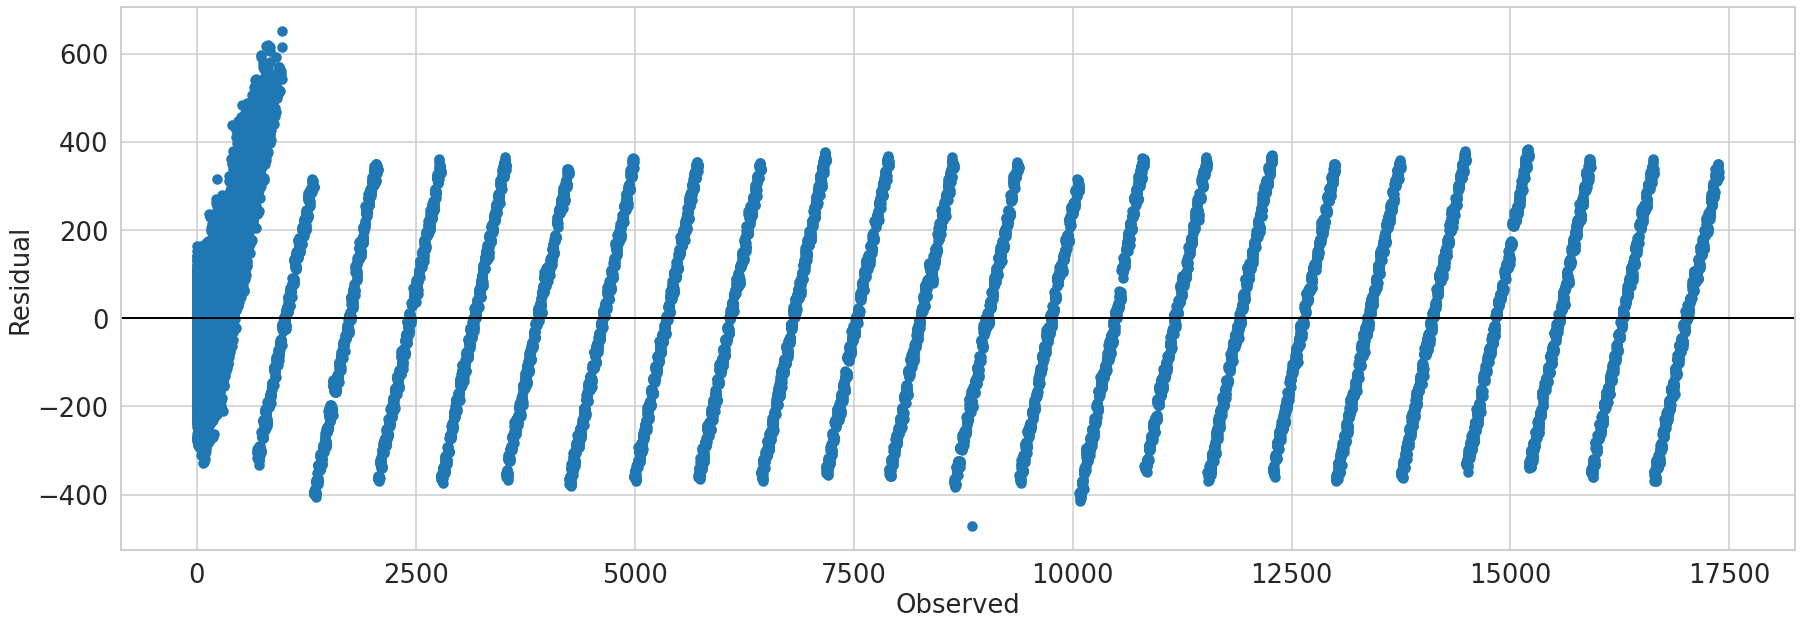

In [ ]:
predicted = cross_val_predict(lin_reg, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, y-predicted)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

El gráfico viola claramente el supuesto de homocedasticidad, que consiste en
que los residuos son aleatorios y no siguen ningún patrón. Para cuantificar aún más nuestros resultados relacionados con el modelo
las puntuaciones de validación cruzada.

In [ ]:
r2_scores = cross_val_score(lin_reg, X, y, cv=10)
mse_scores = cross_val_score(lin_reg, X, y, cv=10,scoring='neg_mean_squared_error')

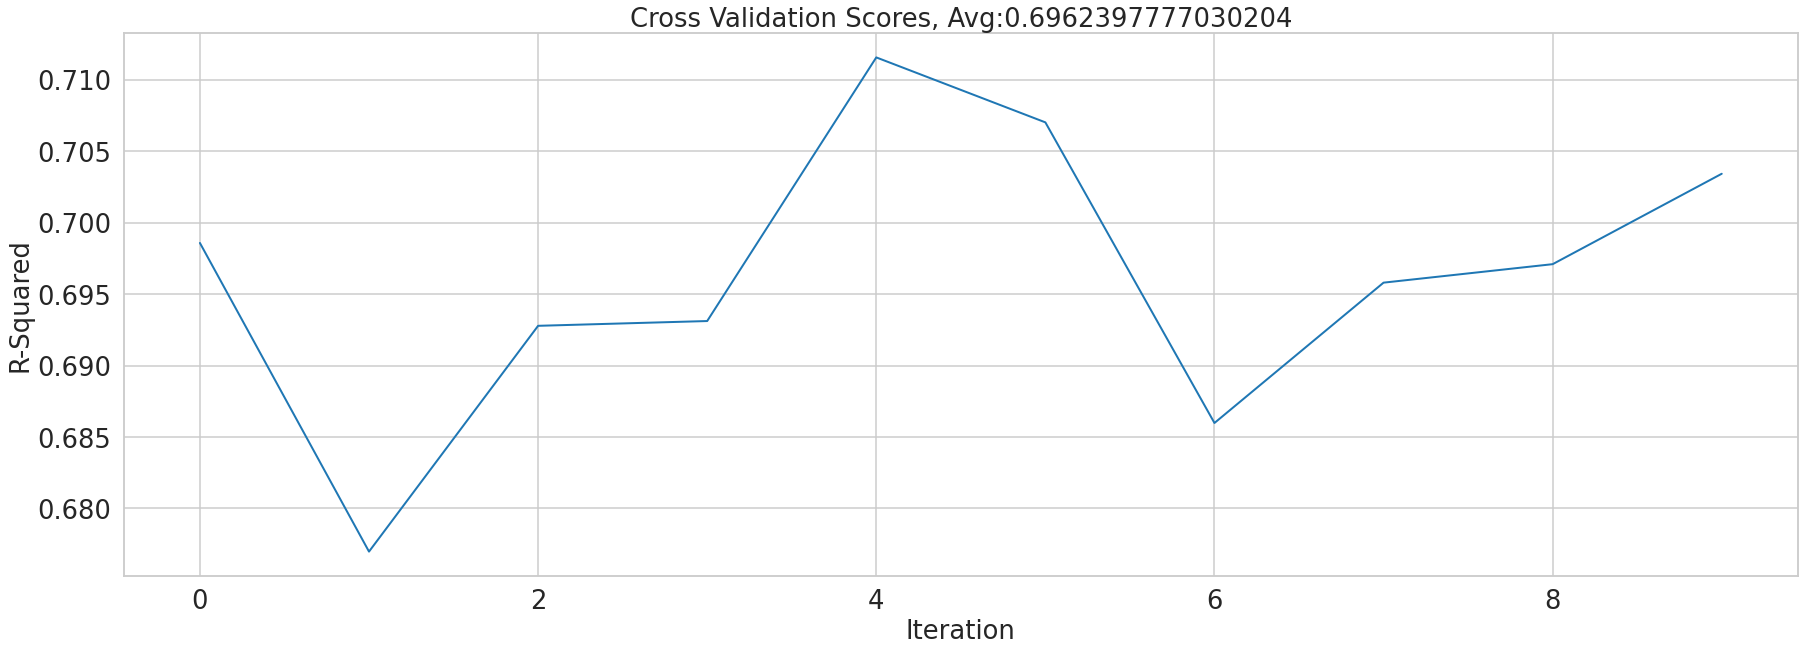

In [ ]:
fig, ax = plt.subplots()
ax.plot([i for i in range(len(r2_scores))],r2_scores,lw=2)
ax.set_xlabel('Iteration')
ax.set_ylabel('R-Squared')
ax.title.set_text("Cross Validation Scores, Avg:{}".format(np.average(r2_scores)))
plt.show()

El r-cuadrado o el coeficiente de determinación es de 0,39 de media para una validación cruzada de 10 veces. Esto
apunta al hecho de que el predictor sólo es capaz de explicar el 39% de la varianza de la variable objetivo.
Es importante entender si los datos
pueden ser modelados por un modelo lineal o no. Esto se deja como un ejercicio para que lo explores.

In [ ]:
print("R-squared::{}".format(r2_scores))
print("MSE::{}".format(mse_scores))

R-squared::[0.69858568 0.67698164 0.69278606 0.69312034 0.71157445 0.70702759
 0.68598408 0.69580761 0.69710068 0.70342964]
MSE::[-32388.37710255 -32387.08931573 -32668.3761671  -30936.36978263
 -31554.34562016 -31878.67783523 -33760.84252235 -33290.33537439
 -32222.88747353 -31859.00589593]


In [ ]:
lin_reg.fit(X,y)

LinearRegression()

## Test Dataset Performance



In [ ]:
test_encoded_attr_list = []
for enc in encoded_attr_list:
    col_name = enc['col_name']
    le = enc['label_enc']
    ohe = enc['ohe_enc']
    test_encoded_attr_list.append({'feature_df':transform_ohe(X_test,
                                                              le,ohe,
                                                              col_name),
                                   'col_name':col_name})
    
    
test_feature_df_list = [X_test[numeric_feature_cols]]
test_feature_df_list.extend([enc['feature_df'] \
                             for enc in test_encoded_attr_list \
                             if enc['col_name'] in cat_attr_list])

test_df_new = pd.concat(test_feature_df_list, axis=1) 
print("Shape::{}".format(test_df_new.shape))

Shape::(5736, 19)


In [ ]:
test_df_new.columns

Index(['temp', 'humidity', 'windspeed', 'hour', 'weekday', 'month', 'year',
       'season_1', 'season_2', 'season_3', 'season_4', 'is_holiday_0',
       'is_holiday_1', 'weather_condition_1', 'weather_condition_2',
       'weather_condition_3', 'weather_condition_4', 'is_workingday_0',
       'is_workingday_1'],
      dtype='object')

In [ ]:
X_test = test_df_new
X_test.shape


(5736, 19)

In [ ]:
y_test.shape

(5736, 2)

In [ ]:
y_test.total_count.values.reshape(-1,1)

array([[425],
       [ 88],
       [  4],
       ...,
       [161],
       [634],
       [116]])

In [ ]:
y_pred = lin_reg.predict(X_test)

residuals = y_test-y_pred

In [ ]:
r2_score = lin_reg.score(X_test,y_test)
print("R-cuadrado::{}".format(r2_score))
print("MSE: %.2f"
      % metrics.mean_squared_error(y_test, y_pred))

R-cuadrado::0.7003468841934601
MSE: 31330.67


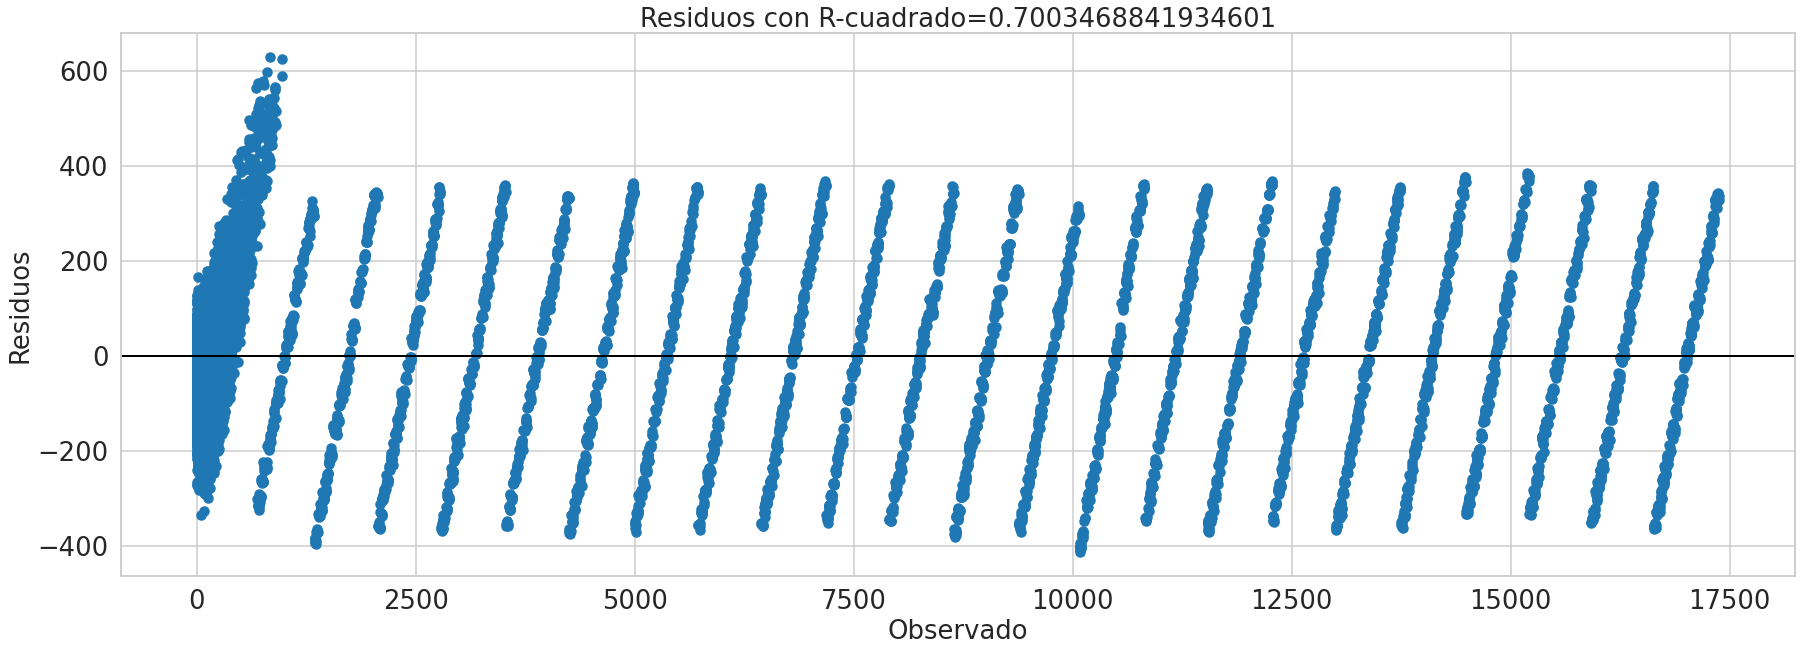

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observado')
ax.set_ylabel('Residuos')
ax.title.set_text("Residuos con R-cuadrado={}".format(np.average(r2_score)))
plt.show()

# Ejercicio

Utilizamos conjuntos de datos de entrenamiento y prueba con 19 atributos (que incluyen tanto numéricos como un
categóricos). El rendimiento es pésimo debido a la no linealidad y a otros factores.
Experimenta con diferentes combinaciones de atributos (utiliza sólo un subconjunto o sólo atributos numéricos
o cualquier combinación de ellos) y prepara diferentes modelos de regresión.

https://www.educative.io/blog/scikit-learn-cheat-sheet-classification-regression-methods#regression

Sigue los mismos pasos que
que se han descrito en esta sección. Comprueba el rendimiento con respecto al modelo preparado en esta sección y analiza si
muestra mejor rendimiento.